# Code-Beispiel: Feature Engineering

In diesem Notebook wollen wir aus zwei Datensätzen die notwendigen Features für das Training eines ML-Modells erstellen.

Hinweis: Dieses Notebook folgt in weiten Teilen diesem (lesenswerten) [Blog-Post](https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8). 

Für dieses Notebook verwenden wir Datensätze von [Sendy Logistic](https://zindi.africa/competitions/sendy-logistics-challenge/data):
Sendy ist ein afrikanischer Bike-Taxi-Service. Die Problemstellung lautet:
"The dataset provided by Sendy includes order details and rider metrics based on orders made on the Sendy platform. The challenge is to predict the estimated time of arrival for orders- from pick-up to drop-off."

Dazu gibt es zwei Datensätze im CSV-Format:
1. Daten zu den einzelnen Fahrten mit verschiedenen Attributen und der zu der tatsächlichen Dauer der Fahrt (welche das zu Label für das Training ist).
2. Details zu den Fahrern welche auf den Fahrten im Einsatz sind.

### Laden der Datensätze

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/artyerokhin/zindy_logistics_challenge/master/Train.csv'
df_trips = pd.read_csv(url)

In [4]:
print(df_trips.shape)
df_trips.head()

(21201, 29)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


Um Datensätze mit vielen Features übersichtlich darzustellen, hilft ein Transponieren des DataFrames.

In [5]:
df_trips.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


Ein zweiter Datensatz enthält weitere Details zu den Fahrern:

In [6]:
url = "https://raw.githubusercontent.com/artyerokhin/zindy_logistics_challenge/master/Riders.csv"
df_riders = pd.read_csv(url)

In [7]:
df_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


Im nächsten Schritt werden die zwei Datensätze mit einem join zusammengeführt.

In [8]:
data = pd.merge(df_trips, df_riders, on='Rider Id')
data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_27440,Order_No_14170,Order_No_21727,Order_No_8301
User Id,User_Id_633,User_Id_2642,User_Id_3339,User_Id_3523,User_Id_87
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,2
Personal or Business,Business,Personal,Business,Personal,Personal
Placement - Day of Month,9,18,31,2,22
Placement - Weekday (Mo = 1),5,5,5,2,2
Placement - Time,9:35:46 AM,3:41:17 PM,12:51:41 PM,7:12:10 AM,10:40:58 AM
Confirmation - Day of Month,9,18,31,2,22
Confirmation - Weekday (Mo = 1),5,5,5,2,2


### Fehlende Datenfelder

Im nächsten Schritt schauen wir uns die fehlende Datenfelder an. Dazu schauen wir wie oft einzelne Felder fehlen:

In [9]:
data.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

Wir sehen dass das Feature `Precipitation in millimeters` fast in allen Datenpunkten und das Feature `Temperature` in vielen Datenpunkten fehlt.
Da beide Feature numerische sind, ersetzen wir das fehlende Feld entsprechend durch den Durchschnittswert der restlichen Felder.

In [10]:
temperature_mean = data['Temperature'].mean()
temperature_mean

23.25888921888922

In [11]:
precip_mean = data['Precipitation in millimeters'].mean()
precip_mean

7.905797101449275

In [12]:
data['Temperature'] = data['Temperature'].fillna(temperature_mean)
data['Precipitation in millimeters'] = data['Precipitation in millimeters'].fillna(precip_mean)

In [13]:
data.isna().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

### Feature Engineering

Im Folgenden wandeln wir nun die Datenattribute in Features um. Dabei beschränken wir uns (mangels Zeit) auf eine Auswahl von Features (im realen Anwendungsfall würde man natürlich alle Features versuchen einzubauen):

In [14]:
selected_columns = ["Personal or Business",
            "Placement - Weekday (Mo = 1)",
            "Distance (KM)",
            "Temperature",
            "Average_Rating",
            "Time from Pickup to Arrival"]

In [15]:
data = data[selected_columns]

Bei diesen Attributen ist `Time from Pickup to Arrival` das Label welches vorhergesagt werden soll. Da es numerisch ist, handelt es sich um ein Regressionsproblem (keine Klassifikation).

Die Attribute `Personal or Business` und `Placement - Weekday (Mo = 1)` sind beide kategorisch, d.h. sie können nicht direkt als Feature genutzt werden, sondern müssen mit Hifle von one-hot-encoding transformiert werden:

In [16]:
one_hot_feature_1 = pd.get_dummies(data["Personal or Business"])
one_hot_feature_1

,Business,Personal
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
21196,1,0
21197,0,1
21198,1,0
21199,1,0


In [17]:
one_hot_feature_2 = pd.get_dummies(data["Placement - Weekday (Mo = 1)"])
one_hot_feature_2

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21196,0,1,0,0,0,0,0
21197,0,0,0,1,0,0,0
21198,1,0,0,0,0,0,0
21199,0,1,0,0,0,0,0


Jede Spalte entspricht hier einem Wochentag.
Als nächstes werden diese Features wieder dem DataFrame hinzugefügt und die ursprünglichen Felder entfernt. 

In [18]:
data = pd.concat([data, one_hot_feature_1, one_hot_feature_2], axis=1)
data.head()

,Personal or Business,Placement - Weekday (Mo = 1),Distance (KM),Temperature,Average_Rating,Time from Pickup to Arrival,Business,Personal,1,2,3,4,5,6,7
0,Business,5,4,20.4,13.8,745,1,0,0,0,0,0,1,0,0
1,Personal,5,20,24.5,13.8,2886,0,1,0,0,0,0,1,0,0
2,Business,5,6,24.7,13.8,2615,1,0,0,0,0,0,1,0,0
3,Personal,2,18,15.2,13.8,2986,0,1,0,1,0,0,0,0,0
4,Personal,2,7,19.2,13.8,1602,0,1,0,1,0,0,0,0,0


In [19]:
data = data.drop(["Personal or Business", "Placement - Weekday (Mo = 1)"], axis=1)
data.head()

,Distance (KM),Temperature,Average_Rating,Time from Pickup to Arrival,Business,Personal,1,2,3,4,5,6,7
0,4,20.4,13.8,745,1,0,0,0,0,0,1,0,0
1,20,24.5,13.8,2886,0,1,0,0,0,0,1,0,0
2,6,24.7,13.8,2615,1,0,0,0,0,0,1,0,0
3,18,15.2,13.8,2986,0,1,0,1,0,0,0,0,0
4,7,19.2,13.8,1602,0,1,0,1,0,0,0,0,0


Die Attribute `Distance (KM)`, `Temperatue` und `Average_Rating` sind numerisch und müssen vor dem Training des ML-Modells normalisiert werden. 

In [20]:
data["Distance (KM)"] = (data["Distance (KM)"] - data["Distance (KM)"].mean()) / data["Distance (KM)"].std()
data["Temperature"] = (data["Temperature"] - data["Temperature"].mean()) / data["Temperature"].std()
data["Average_Rating"] = (data["Average_Rating"] - data["Average_Rating"].mean()) / data["Average_Rating"].std()

In [21]:
data.head()

,Distance (KM),Temperature,Average_Rating,Time from Pickup to Arrival,Business,Personal,1,2,3,4,5,6,7
0,-0.971347,-0.887301,-0.09008,745,1,0,0,0,0,0,1,0,0
1,1.851038,0.385198,-0.09008,2886,0,1,0,0,0,0,1,0,0
2,-0.618549,0.447271,-0.09008,2615,1,0,0,0,0,0,1,0,0
3,1.498240,-2.501203,-0.09008,2986,0,1,0,1,0,0,0,0,0
4,-0.442150,-1.259740,-0.09008,1602,0,1,0,1,0,0,0,0,0


### Model Training

Nach diesen Schritten könne wir jetzt eine lineare Regression auf den Daten trainieren.

In [22]:
from sklearn.model_selection import train_test_split
features = data.drop(columns = ['Time from Pickup to Arrival']) # alle Spalten außer Sales
label = data['Time from Pickup to Arrival']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error

predictions = reg.predict(X_test)
mse =  mean_squared_error(y_test, predictions)
print("Mean squared error (MSE) auf Testdaten: %.2f" % mse)

Mean squared error (MSE) auf Testdaten: 633826.92


In [29]:
import math
math.sqrt(mse)

796.132475295667

Wie wir sehen, liegen wir im Schnitt 796 Sekunden (= 13 Minuten) daneben. Schauen wir uns kurz die Verteilung des Labels an, um dies einzuordnen:

<AxesSubplot:>

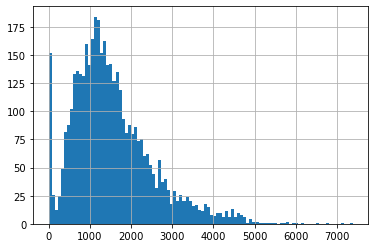

In [32]:
y_test.hist(bins= 100)